# Sheet 02, Exercise 2
Anne, Asli, Fabian

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,12)
%matplotlib inline

\begin{align}
f_1(x) &= \sin(x) \\
f'_1(x) &= \cos(x) \\
f_2(x) &= 2\left\lfloor\frac{x}{\pi}\right\rfloor-\cos(x \mod\pi) +1 \\
f'_2(x) &= \sin(x \mod \pi) \quad \mathrm{ for} \sin(x) \neq 0 
\end{align}

In [26]:
def f1(x):
    return np.sin(x)


def f2(x):
    return 2 * np.floor(x / np.pi) - np.cos(x % np.pi) + 1


def f1Prime(x):
    return np.cos(x)


def f2Prime(x):
    return np.sin(x % np.pi)

In [27]:
def zweipunkt(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)


def vierpunkt(f, x, h):
    return (f(x - 2 * h) + 8 * f(x + h) - f(x + 2 * h) - 8 * f(x - h)) / (12 * h)

## a)

In [28]:
x = np.float32(np.pi / 4)  # The x value at wich we look for a good h
h_arr = np.logspace(-10, 0, 1000, dtype=np.float32)
h1 = 5e-4  # result of plot below

Text(0.5, 0, '$h$')

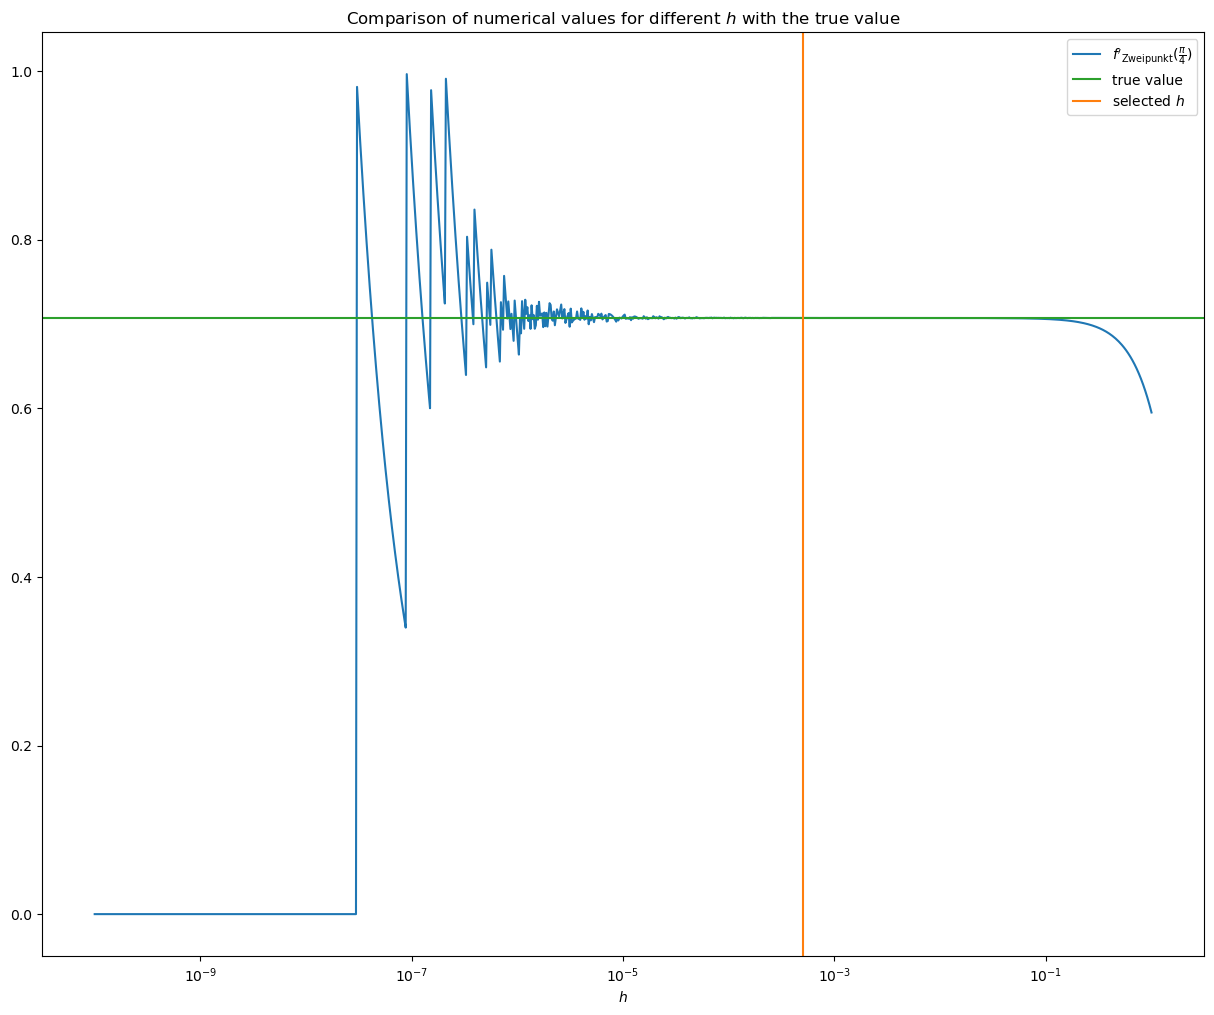

In [29]:
plt.plot(
    h_arr, zweipunkt(f1, x, h_arr), label=r"$f'_\mathrm{Zweipunkt}(\frac{\pi}{4})$"
)
plt.xscale("log")
plt.axhline(y=f1Prime(x), color="tab:green", label="true value")
plt.axvline(x=h1, color="tab:orange", label="selected $h$")
plt.legend()
plt.title("Comparison of numerical values for different $h$ with the true value")
plt.xlabel("$h$")

Text(0.5, 1.0, 'Error of the numerical derivative using $h = 0.0005$')

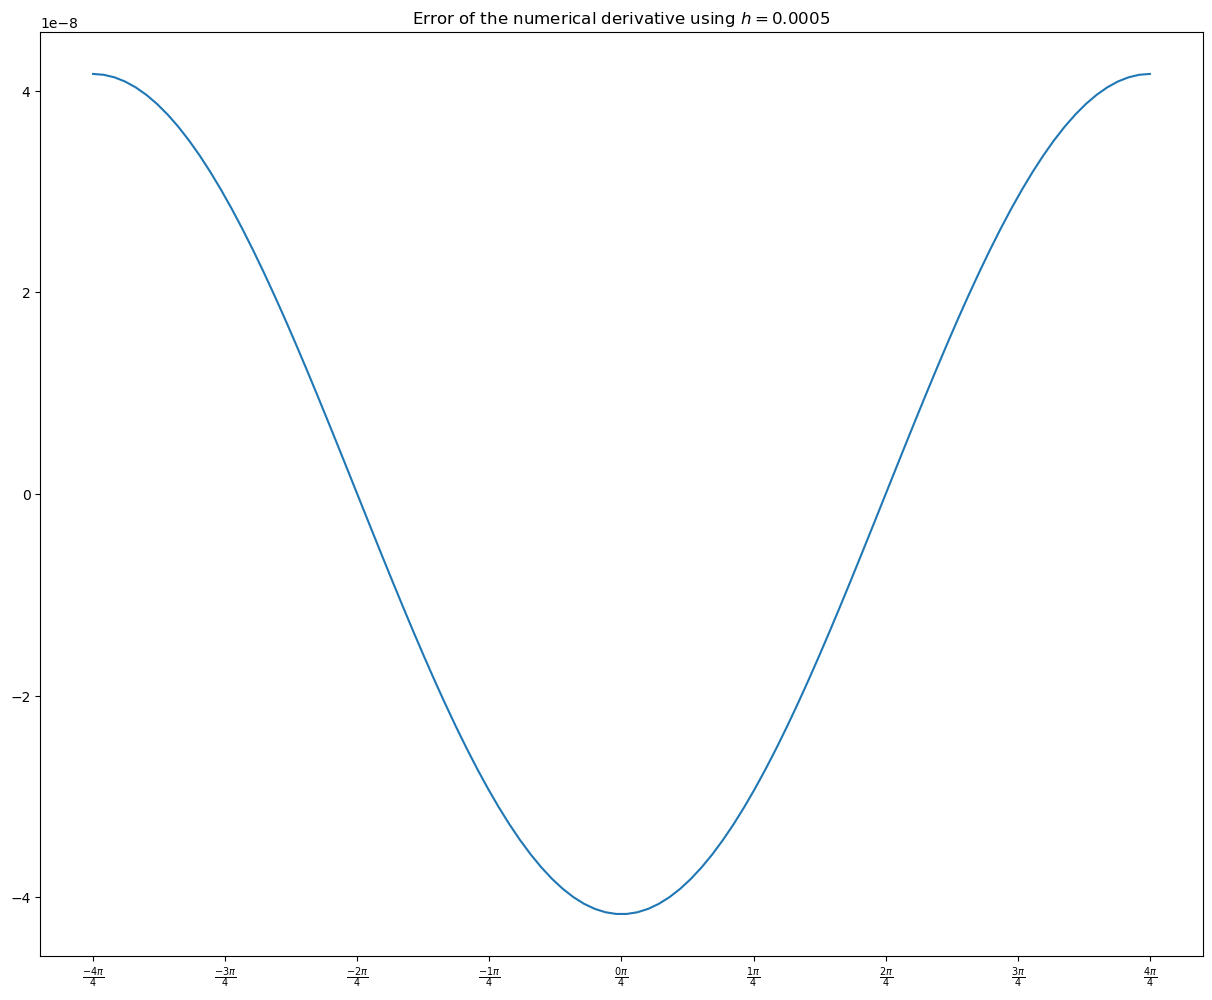

In [30]:
x_arr = np.linspace(-np.pi, np.pi, 100)
plt.plot(x_arr, (zweipunkt(f1, x_arr, h1) - f1Prime(x_arr)))
plt.xticks(
    np.linspace(-np.pi, np.pi, 9),
    [rf"$\frac{{{x}\pi}}{{4}}$" for x in np.linspace(-4, 4, 9, dtype=int)],
)  # This should be a build in thing
plt.title(f"Error of the numerical derivative using $h = {h1}$")

## b)

In [31]:
def twoPrime(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2


def f1TwoPrime(x):
    return -np.sin(x)

Text(0.5, 0, '$h$')

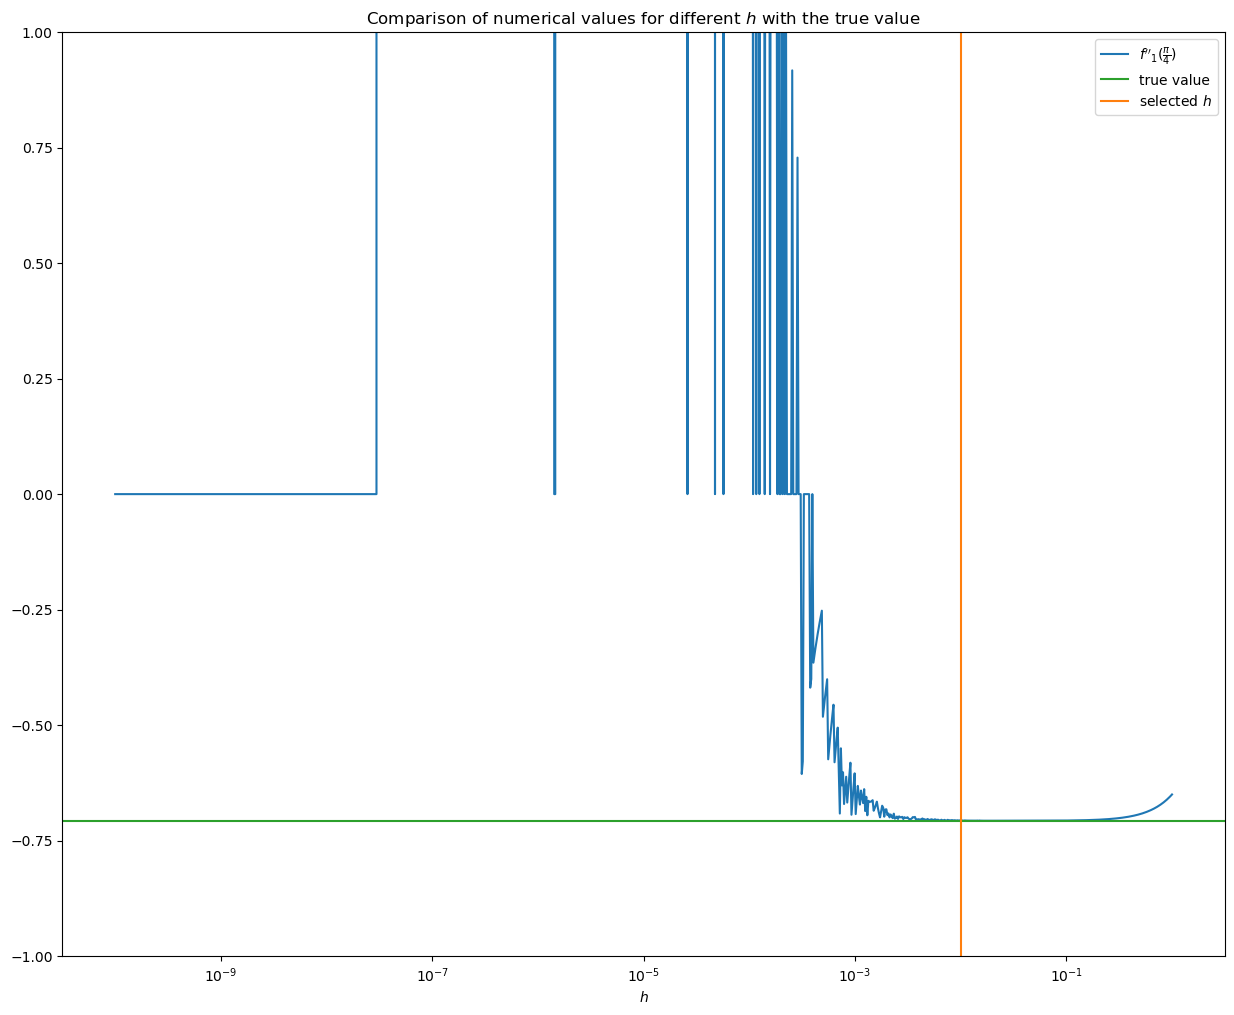

In [32]:
h2 = 1e-2

plt.plot(h_arr, twoPrime(f1, x, h_arr), label=r"$f''_1(\frac{\pi}{4})$")
plt.xscale("log")
plt.ylim(-1, 1)
plt.axhline(y=f1TwoPrime(x), color="tab:green", label="true value")
plt.axvline(x=h2, color="tab:orange", label="selected $h$")
plt.legend()
plt.title("Comparison of numerical values for different $h$ with the true value")
plt.xlabel("$h$")

Text(0.5, 1.0, 'Error of the second numerical derivative using $h = 0.01$')

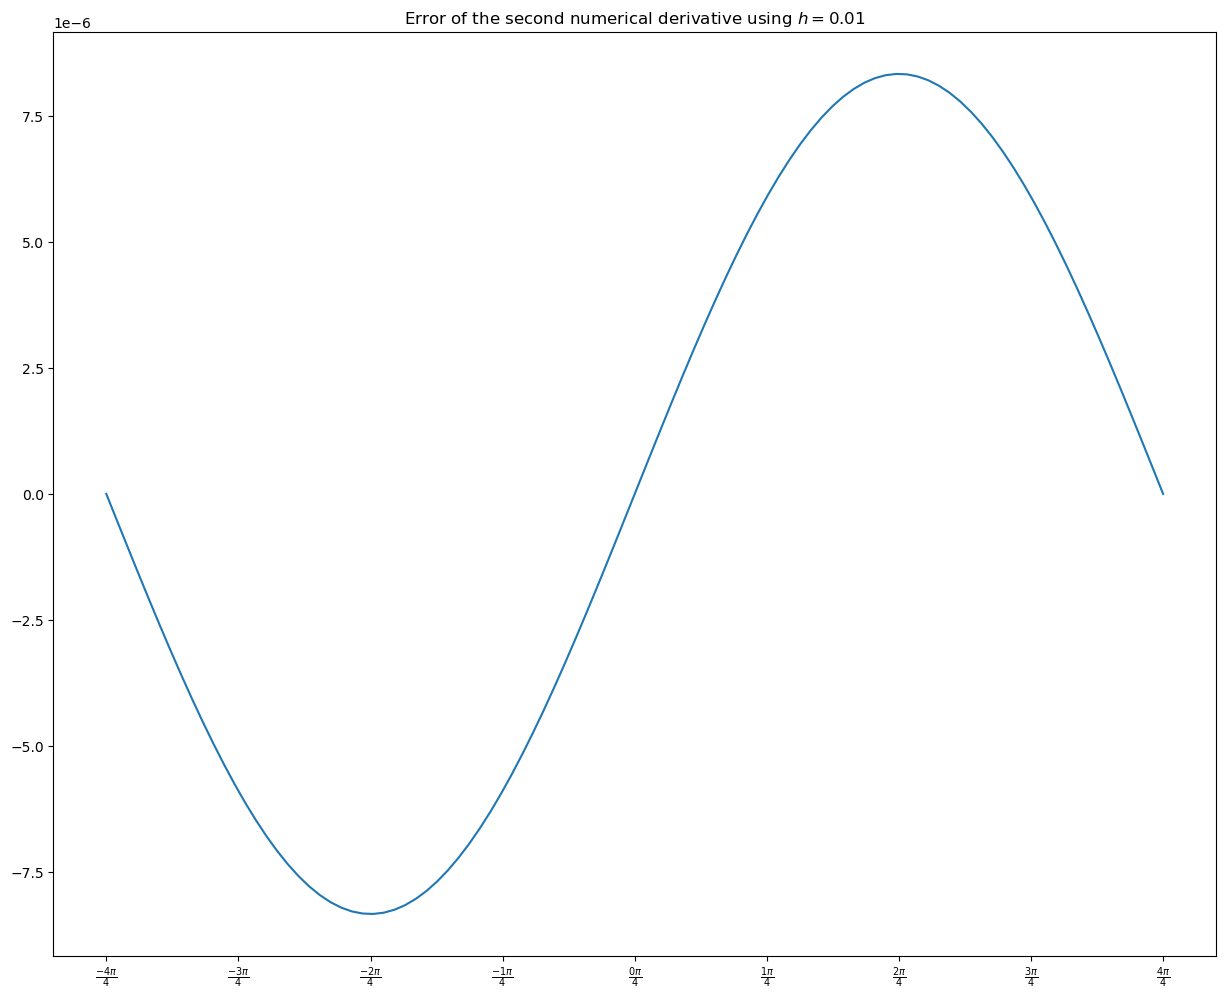

In [33]:
plt.plot(x_arr, (twoPrime(f1, x_arr, h2) - f1TwoPrime(x_arr)))
plt.xticks(
    np.linspace(-np.pi, np.pi, 9),
    [rf"$\frac{{{x}\pi}}{{4}}$" for x in np.linspace(-4, 4, 9, dtype=int)],
)  # This should be a build in thing
plt.title(f"Error of the second numerical derivative using $h = {h2}$")

The errors of the second derivative are 2 orders of magnitude bigger. This may be, because we must choose a bigger $h$ to be in numerical stable.

## c)

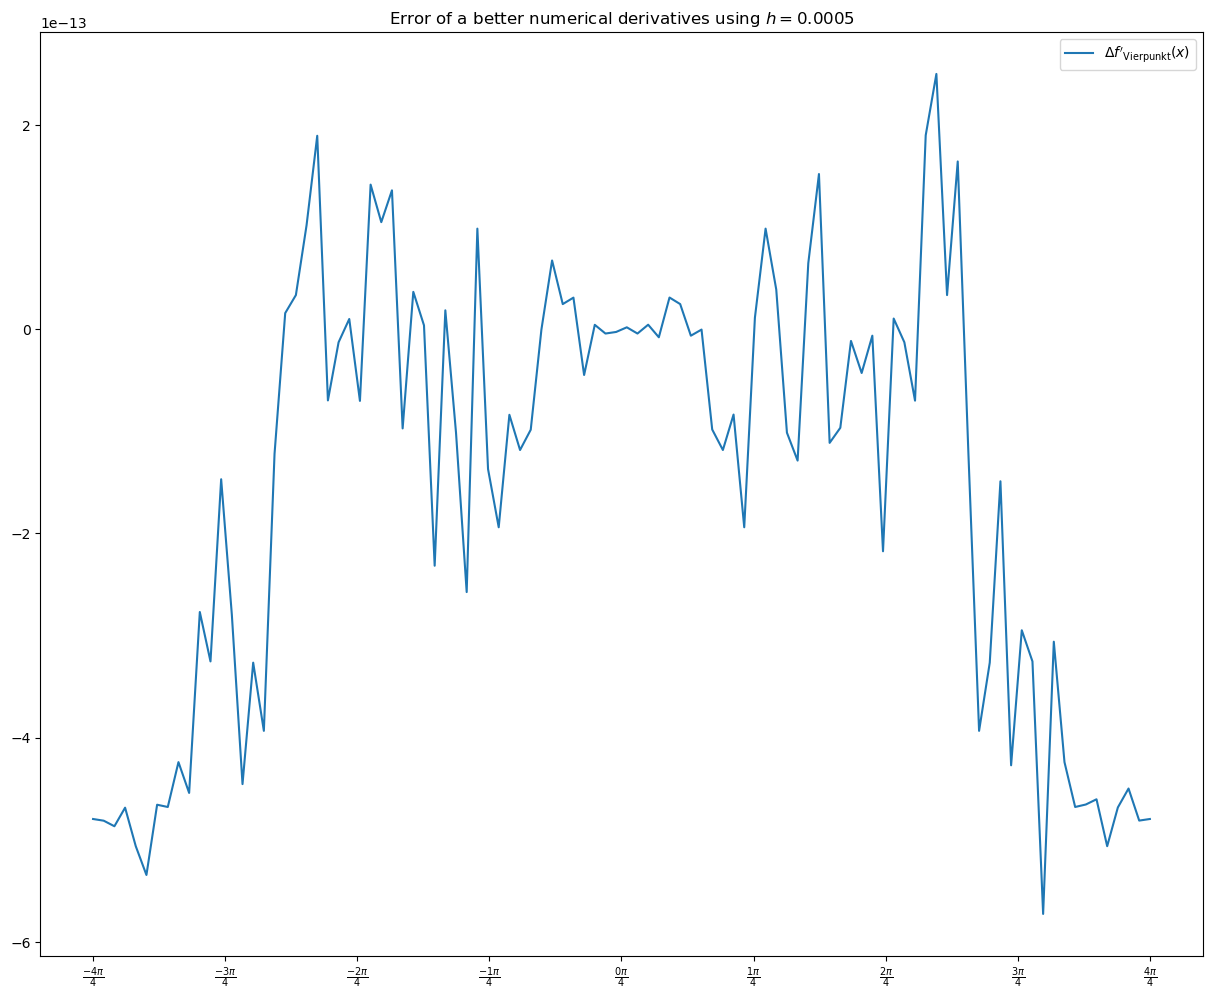

In [34]:
plt.plot(
    x_arr,
    (vierpunkt(f1, x_arr, h1) - f1Prime(x_arr)),
    label="$\Delta f'_\mathrm{Vierpunkt}(x)$",
)
plt.xticks(
    np.linspace(-np.pi, np.pi, 9),
    [rf"$\frac{{{x}\pi}}{{4}}$" for x in np.linspace(-4, 4, 9, dtype=int)],
)  # This should be a build in thing
plt.title(f"Error of a better numerical derivatives using $h = {h1}$")
plt.legend()

The errors of the Vierpunktregel are about five orders of magnitude smaller.

## d)

Text(0.5, 1.0, 'Errors of different numerical derivatives of $f_2$ using $h=0.0005$')

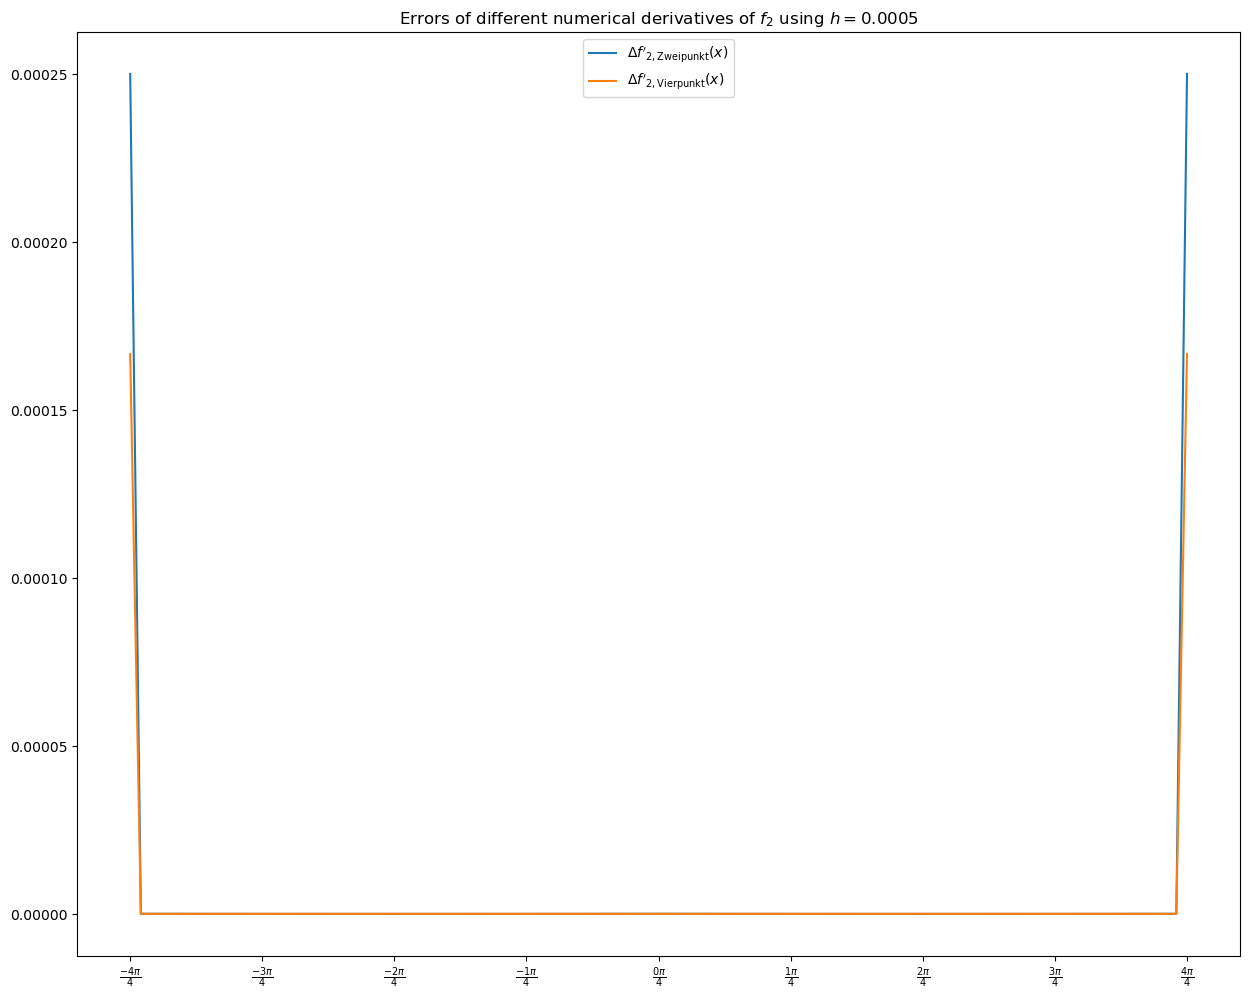

In [35]:
plt.plot(
    x_arr,
    zweipunkt(f2, x_arr, h1) - f2Prime(x_arr),
    label="$\Delta f'_{2,\mathrm{Zweipunkt}}(x)$",
)
plt.plot(
    x_arr,
    vierpunkt(f2, x_arr, h1) - f2Prime(x_arr),
    label="$\Delta f'_{2,\mathrm{Vierpunkt}}(x)$",
)
plt.xticks(
    np.linspace(-np.pi, np.pi, 9),
    [rf"$\frac{{{x}\pi}}{{4}}$" for x in np.linspace(-4, 4, 9, dtype=int)],
)  # This should be a build in thing
plt.legend()
plt.title(f"Errors of different numerical derivatives of $f_2$ using $h={h1}$")

For $f_2$ the errors of both methods are very similar.